<a href="https://colab.research.google.com/github/MehmetAltinkurt/Computer_Vision_Projects/blob/main/Wheat/Wheat_Yellow_Rust.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download nafishamoin/new-bangladeshi-crop-disease

 99% 2.33G/2.35G [00:31<00:00, 80.6MB/s]
100% 2.35G/2.35G [00:31<00:00, 79.0MB/s]


In [ ]:
! unzip new-bangladeshi-crop-disease

In [7]:
import os
import shutil


import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import PIL
import PIL.Image
from matplotlib.image import imread

import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import models
from keras import optimizers
from sklearn.metrics import classification_report, confusion_matrix

In [8]:
tf.__version__

'2.12.0'

In [9]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [10]:
!nvidia-smi

Fri Mar 31 06:31:49 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8     9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [11]:
original_dataset_dir="/content/BangladeshiCrops/BangladeshiCrops/Crop___Disease/Wheat"

In [12]:
base_dir="/content/tempdir"
os.mkdir(base_dir)

In [13]:
print('total Healthy images:', len(os.listdir(original_dataset_dir+"/Wheat___Healthy")))
print('total Yellow Rust images:', len(os.listdir(original_dataset_dir+"/Wheat___Yellow_Rust")))

total Healthy images: 1116
total Yellow Rust images: 924


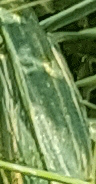

In [14]:
PIL.Image.open(original_dataset_dir+"/Wheat___Yellow_Rust/"+os.listdir(original_dataset_dir+"/Wheat___Yellow_Rust/")[923])

In [15]:
#to see if the images are same sized
print(imread(original_dataset_dir+"/Wheat___Yellow_Rust/"+os.listdir(original_dataset_dir+"/Wheat___Yellow_Rust/")[0]).shape)
print(imread(original_dataset_dir+"/Wheat___Yellow_Rust/"+os.listdir(original_dataset_dir+"/Wheat___Yellow_Rust/")[923]).shape)
print(imread(original_dataset_dir+"/Wheat___Yellow_Rust/"+os.listdir(original_dataset_dir+"/Wheat___Yellow_Rust/")[100]).shape)
print(imread(original_dataset_dir+"/Wheat___Yellow_Rust/"+os.listdir(original_dataset_dir+"/Wheat___Yellow_Rust/")[350]).shape)
print(imread(original_dataset_dir+"/Wheat___Yellow_Rust/"+os.listdir(original_dataset_dir+"/Wheat___Yellow_Rust/")[600]).shape)

(144, 100, 3)
(184, 96, 3)
(70, 158, 3)
(128, 182, 3)
(172, 64, 3)


In [16]:
healthy_wheat_list = []

for root, dirs, files in os.walk(original_dataset_dir+"/Wheat___Healthy/"):
    for file in files:
        #all 
        if file.endswith(".jpg") or file.endswith(".png") or file.endswith(".jpeg"):
            #healthy_wheat_list.append(os.path.join(root, file))
            healthy_wheat_list.append(file)

rusty_wheat_list = []

for root, dirs, files in os.walk(original_dataset_dir+"/Wheat___Yellow_Rust/"):
    for file in files:
        #all 
        if file.endswith(".jpg") or file.endswith(".png") or file.endswith(".jpeg"):
            #rusty_wheat_list.append(os.path.join(root, file))
            rusty_wheat_list.append(file)




In [17]:
height_list=[]
width_list=[]

for im in healthy_wheat_list:
  height_list.append(imread(original_dataset_dir+"/Wheat___Healthy/"+im).shape[0])
  width_list.append(imread(original_dataset_dir+"/Wheat___Healthy/"+im).shape[1])

for im in rusty_wheat_list:
  height_list.append(imread(original_dataset_dir+"/Wheat___Yellow_Rust/"+im).shape[0])
  width_list.append(imread(original_dataset_dir+"/Wheat___Yellow_Rust/"+im).shape[1])

print(height_list)
print(width_list)

[535, 1599, 1108, 740, 353, 522, 392, 403, 1261, 1457, 505, 362, 747, 368, 1780, 601, 840, 773, 850, 707, 312, 823, 775, 801, 530, 928, 1835, 1025, 302, 1067, 1304, 696, 985, 2939, 1240, 450, 362, 648, 399, 1352, 376, 634, 1186, 435, 1436, 1397, 1373, 1105, 522, 1037, 472, 975, 532, 1344, 280, 999, 545, 755, 1354, 1192, 718, 1252, 668, 1095, 537, 1976, 392, 1068, 1236, 878, 531, 856, 419, 535, 834, 1246, 835, 343, 579, 795, 638, 928, 793, 408, 709, 398, 982, 1082, 361, 1557, 296, 1108, 498, 929, 1051, 413, 657, 453, 389, 847, 870, 284, 282, 292, 723, 527, 807, 1421, 240, 1338, 1132, 1821, 1077, 483, 696, 676, 710, 587, 1143, 987, 1244, 1334, 1046, 1087, 472, 904, 903, 711, 413, 446, 1022, 637, 577, 631, 859, 640, 895, 966, 465, 999, 892, 613, 1130, 679, 1920, 407, 433, 787, 262, 1015, 670, 1494, 357, 1188, 1809, 1151, 1106, 601, 502, 580, 723, 606, 465, 882, 666, 697, 917, 717, 1101, 391, 333, 347, 260, 727, 775, 239, 610, 579, 1040, 944, 310, 290, 835, 680, 849, 859, 1100, 586, 937, 4

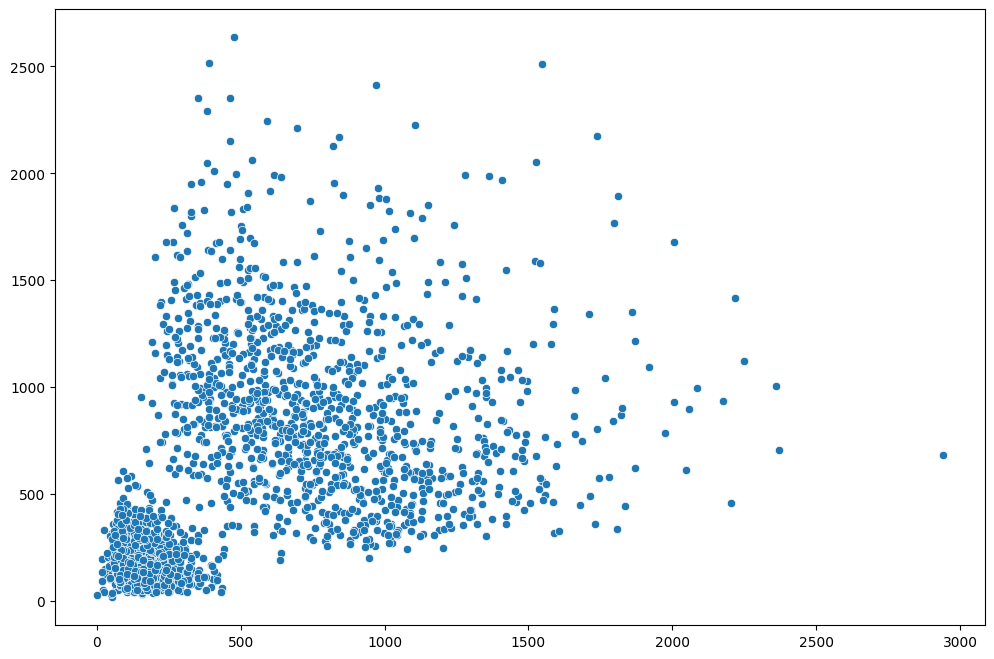

In [18]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x=height_list, y=width_list);


In [19]:
print(min(height_list))
min_image_index=np.argmin(height_list)
print("index:",min_image_index)
im=PIL.Image.open(original_dataset_dir+"/Wheat___Yellow_Rust/"+rusty_wheat_list[min_image_index-len(healthy_wheat_list)])
im.show()
imread(original_dataset_dir+"/Wheat___Yellow_Rust/"+rusty_wheat_list[min_image_index-len(healthy_wheat_list)]).shape

1
index: 2007


(1, 30, 3)

In [20]:
print(min(width_list))
min_image_index=np.argmin(width_list)
im=PIL.Image.open(original_dataset_dir+"/Wheat___Yellow_Rust/"+rusty_wheat_list[min_image_index-len(healthy_wheat_list)])
im.show()
imread(original_dataset_dir+"/Wheat___Yellow_Rust/"+rusty_wheat_list[min_image_index-len(healthy_wheat_list)]).shape

18


(52, 18, 3)

In [21]:
treshold_for_imsize=20
print("count of images with height less than 20px:",sum(np.array(height_list)<treshold_for_imsize))
print("count of images with width less than 20px:",sum(np.array(width_list)<treshold_for_imsize))

count of images with height less than 20px: 4
count of images with width less than 20px: 1


In [22]:
min_height_image_indexes=[i for i in range(len(height_list)) if height_list[i] < treshold_for_imsize]
for i in min_height_image_indexes:
  im=PIL.Image.open(original_dataset_dir+"/Wheat___Yellow_Rust/"+rusty_wheat_list[i-len(healthy_wheat_list)])
  im.show()
  print(imread(original_dataset_dir+"/Wheat___Yellow_Rust/"+rusty_wheat_list[i-len(healthy_wheat_list)]).shape)

(18, 196, 3)


(18, 94, 3)


(18, 138, 3)


(1, 30, 3)


In [23]:
#decided to exclude the image with the height of 1px
rusty_wheat_list.pop(min_image_index-len(healthy_wheat_list))
print(len(rusty_wheat_list))

923


In [24]:
height_list.pop(min_image_index)
width_list.pop(min_image_index)

18

In [25]:
np.mean(height_list),np.median(height_list)

(518.5890142226582, 372.0)

In [26]:
np.mean(width_list),np.median(width_list)

(590.3786169691025, 438.0)

In [27]:
img_size=(372,372)

In [28]:
seed=53
np.random.seed(seed)

In [29]:
np.random.shuffle(healthy_wheat_list)

print(len(healthy_wheat_list))
healthy_test_list=healthy_wheat_list[:int(len(healthy_wheat_list)/5)]
healthy_validation_list=healthy_wheat_list[int(len(healthy_wheat_list)/5):2*int(len(healthy_wheat_list)/5):]
healthy_train_list=healthy_wheat_list[2*int(len(healthy_wheat_list)/5)::]

print(len(healthy_test_list))
print(len(healthy_validation_list))
print(len(healthy_train_list))

1116
223
223
670


In [30]:
np.random.shuffle(rusty_wheat_list)

print(len(rusty_wheat_list))
rusty_test_list=rusty_wheat_list[:int(len(rusty_wheat_list)/5)]
rusty_validation_list=rusty_wheat_list[int(len(rusty_wheat_list)/5):2*int(len(rusty_wheat_list)/5):]
rusty_train_list=rusty_wheat_list[2*int(len(rusty_wheat_list)/5)::]

print(len(rusty_test_list))
print(len(rusty_validation_list))
print(len(rusty_train_list))

923
184
184
555


In [31]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)
train_healthy_dir = os.path.join(train_dir, 'healthy')
os.mkdir(train_healthy_dir)
train_yellow_rust_dir = os.path.join(train_dir, 'yellow_rust')
os.mkdir(train_yellow_rust_dir)
validation_healthy_dir = os.path.join(validation_dir, 'healthy')
os.mkdir(validation_healthy_dir)
validation_yellow_rust_dir = os.path.join(validation_dir, 'yellow_rust')
os.mkdir(validation_yellow_rust_dir)
test_healthy_dir = os.path.join(test_dir, 'healthy')
os.mkdir(test_healthy_dir)
test_yellow_rust_dir = os.path.join(test_dir, 'yellow_rust')
os.mkdir(test_yellow_rust_dir)

In [32]:
for fname in healthy_train_list:
  src = os.path.join(original_dataset_dir+"/Wheat___Healthy/", fname)
  dst = os.path.join(train_healthy_dir, fname)
  shutil.copyfile(src, dst)
for fname in healthy_validation_list:
  src = os.path.join(original_dataset_dir+"/Wheat___Healthy/", fname)
  dst = os.path.join(validation_healthy_dir, fname)
  shutil.copyfile(src, dst)
for fname in healthy_test_list:
  src = os.path.join(original_dataset_dir+"/Wheat___Healthy/", fname)
  dst = os.path.join(test_healthy_dir, fname)
  shutil.copyfile(src, dst)
for fname in rusty_train_list:
  src = os.path.join(original_dataset_dir+"/Wheat___Yellow_Rust/", fname)
  dst = os.path.join(train_yellow_rust_dir, fname)
  shutil.copyfile(src, dst)
for fname in rusty_validation_list:
  src = os.path.join(original_dataset_dir+"/Wheat___Yellow_Rust/", fname)
  dst = os.path.join(validation_yellow_rust_dir, fname)
  shutil.copyfile(src, dst)
for fname in rusty_test_list:
  src = os.path.join(original_dataset_dir+"/Wheat___Yellow_Rust/", fname)
  dst = os.path.join(test_yellow_rust_dir, fname)
  shutil.copyfile(src, dst)

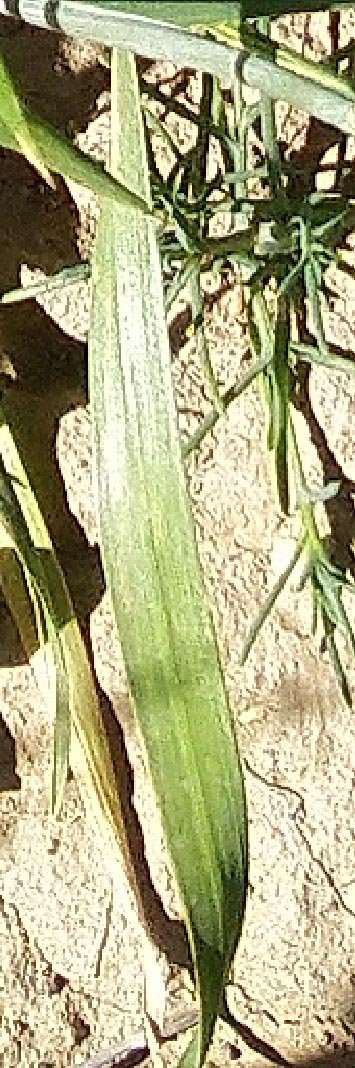

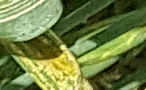

In [33]:
im=PIL.Image.open("/content/tempdir/test/healthy/Healthy018.jpg")
im.show()
im=PIL.Image.open("/content/tempdir/test/yellow_rust/Yellow_rust004.jpg")
im.show()

In [34]:
image_gen = ImageDataGenerator(rescale=1./255)

In [35]:
train_image_gen = image_gen.flow_from_directory(directory=train_dir,
                                                target_size=img_size,
                                                color_mode='rgb',
                                                batch_size=20,
                                                class_mode='binary',
                                                shuffle=True)

Found 1225 images belonging to 2 classes.


In [36]:
test_image_gen = image_gen.flow_from_directory(directory=test_dir,
                                               target_size=img_size,
                                               color_mode='rgb',
                                               batch_size=20,
                                               class_mode='binary',
                                               shuffle=True)

Found 407 images belonging to 2 classes.


In [37]:
val_image_gen = image_gen.flow_from_directory(directory=validation_dir,
                                                target_size=img_size,
                                                color_mode='rgb',
                                                batch_size=20,
                                                class_mode='binary',
                                                shuffle=True)

Found 407 images belonging to 2 classes.


In [ ]:
train_image_gen.class_indices

{'healthy': 0, 'yellow_rust': 1}

In [ ]:
test_image_gen.class_indices

{'healthy': 0, 'yellow_rust': 1}

In [ ]:
val_image_gen.class_indices

{'healthy': 0, 'yellow_rust': 1}

In [ ]:
train_image_gen[0][0].shape

(20, 372, 372, 3)

In [42]:

type(test_image_gen[0][0][0])

numpy.ndarray

In [43]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu',
                        input_shape=img_size + (3,)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(1024, activation='relu'))

model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 370, 370, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 185, 185, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 183, 183, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 91, 91, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 89, 89, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 44, 44, 256)      0

In [45]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [46]:
model.fit(train_image_gen,
          epochs=20,
          steps_per_epoch=len(train_image_gen),
          validation_data=val_image_gen,
          validation_steps=len(val_image_gen))

Epoch 1/20
62/62 [==============================] - 41s 362ms/step - loss: 0.6795 - acc: 0.8073 - val_loss: 0.0822 - val_acc: 0.9705
Epoch 2/20
62/62 [==============================] - 21s 330ms/step - loss: 0.1267 - acc: 0.9706 - val_loss: 0.0393 - val_acc: 0.9926
Epoch 3/20
62/62 [==============================] - 21s 332ms/step - loss: 0.0537 - acc: 0.9878 - val_loss: 0.0251 - val_acc: 0.9926
Epoch 4/20
62/62 [==============================] - 21s 329ms/step - loss: 0.0316 - acc: 0.9902 - val_loss: 0.0625 - val_acc: 0.9803
Epoch 5/20
62/62 [==============================] - 20s 329ms/step - loss: 0.0598 - acc: 0.9788 - val_loss: 0.0916 - val_acc: 0.9877
Epoch 6/20
62/62 [==============================] - 20s 325ms/step - loss: 0.0382 - acc: 0.9918 - val_loss: 0.1261 - val_acc: 0.9558
Epoch 7/20
62/62 [==============================] - 20s 327ms/step - loss: 0.1790 - acc: 0.9624 - val_loss: 0.0525 - val_acc: 0.9926
Epoch 8/20
62/62 [==============================] - 22s 349ms/step - 

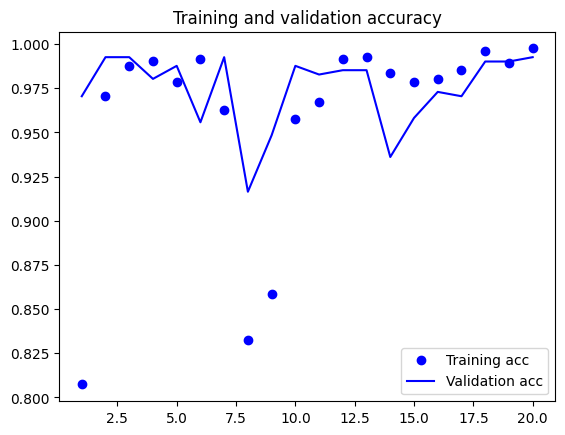

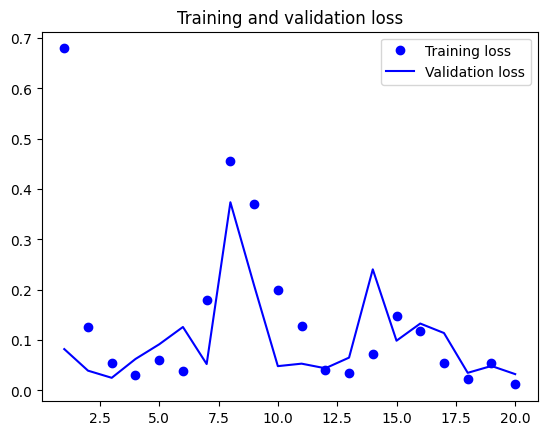

In [47]:
acc = model.history.history['acc']
val_acc = model.history.history['val_acc']
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [81]:
score = model.evaluate(test_image_gen)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

21/21 [==============================] - 5s 222ms/step - loss: 0.0187 - acc: 0.9951
Test loss: 0.01873997040092945
Test accuracy: 0.9950860142707825


In [56]:
test_steps_per_epoch = np.math.ceil(test_image_gen.samples / test_image_gen.batch_size)

predictions = model.predict(test_image_gen, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)
y_pred = predictions > 0.5

21/21 [==============================] - 7s 313ms/step


In [58]:
test_image_gen.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [59]:
predictions

array([[9.9992394e-01],
       [0.0000000e+00],
       [0.0000000e+00],
       [9.9991262e-01],
       [9.9983692e-01],
       [9.9996471e-01],
       [9.9968660e-01],
       [0.0000000e+00],
       [9.9952877e-01],
       [1.3145882e-02],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [9.9990678e-01],
       [9.9987471e-01],
       [9.9951756e-01],
       [0.0000000e+00],
       [9.9975616e-01],
       [0.0000000e+00],
       [9.9977893e-01],
       [0.0000000e+00],
       [9.9956149e-01],
       [0.0000000e+00],
       [0.0000000e+00],
       [2.8066689e-03],
       [9.9987102e-01],
       [9.9968064e-01],
       [9.9949706e-01],
       [0.0000000e+00],
       [9.9767095e-01],
       [0.0000000e+00],
       [9.9978989e-01],
       [0.0000000e+00],
       [2.7089442e-23],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [9.9901378e-01],
       [0.0000000e+00],
       [0.000000

In [51]:
y_pred

array([[False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [

In [67]:
pred_prob = model.predict(test_image_gen)

21/21 [==============================] - 4s 188ms/step


In [68]:
pred_prob

array([[0.0000000e+00],
       [0.0000000e+00],
       [9.9923372e-01],
       [9.9989283e-01],
       [9.9987793e-01],
       [9.9953890e-01],
       [0.0000000e+00],
       [1.9579526e-27],
       [0.0000000e+00],
       [0.0000000e+00],
       [9.9991584e-01],
       [0.0000000e+00],
       [9.9983692e-01],
       [9.9991262e-01],
       [9.9983692e-01],
       [9.9988985e-01],
       [9.9991393e-01],
       [9.9977893e-01],
       [9.9992371e-01],
       [9.9975461e-01],
       [0.0000000e+00],
       [0.0000000e+00],
       [9.9976391e-01],
       [0.0000000e+00],
       [0.0000000e+00],
       [9.9982685e-01],
       [0.0000000e+00],
       [9.9993825e-01],
       [9.9985647e-01],
       [9.9974948e-01],
       [0.0000000e+00],
       [9.9962652e-01],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [9.9980766e-01],
       [0.0000000e+00],
       [0.0000000e+00],
       [9.9983287e-01],
       [0.0000000e+00],
       [9.998220

In [69]:
y_pred = pred_prob > 0.5

In [70]:
y_test = test_image_gen.classes
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [71]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.56      0.56       223
           1       0.47      0.47      0.47       184

    accuracy                           0.52       407
   macro avg       0.51      0.51      0.51       407
weighted avg       0.52      0.52      0.52       407



In [72]:
confusion_matrix(y_test, y_pred)

array([[125,  98],
       [ 98,  86]])

In [73]:
pred_prob = model.predict(test_image_gen)
y_pred = pred_prob > 0.5
y_test = test_image_gen.classes
print(classification_report(y_test, y_pred))

21/21 [==============================] - 4s 189ms/step
              precision    recall  f1-score   support

           0       0.51      0.51      0.51       223
           1       0.41      0.41      0.41       184

    accuracy                           0.46       407
   macro avg       0.46      0.46      0.46       407
weighted avg       0.46      0.46      0.46       407



In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.51      0.51       223
           1       0.41      0.41      0.41       184

    accuracy                           0.46       407
   macro avg       0.46      0.46      0.46       407
weighted avg       0.46      0.46      0.46       407



In [75]:
confusion_matrix(y_test, y_pred)

array([[114, 109],
       [109,  75]])

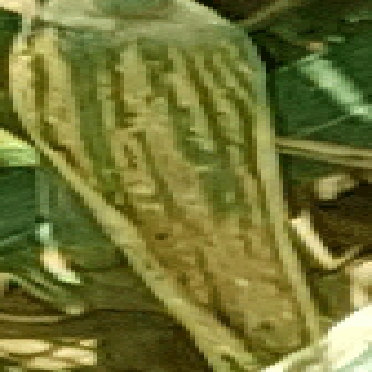

In [ ]:
PIL.Image.fromarray(np.asarray((test_image_gen[0][0][0]*255).astype(np.uint8))).show()